In [22]:
from accelerate.utils import write_basic_config
write_basic_config()

Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


False

drawing in black and white of Egypt pyramids with the caption "PYRAMID"


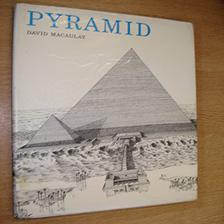

In [23]:
from PIL import Image
from IPython.display import display
import os
import json

# Function to save content of jsonl file in a dictionary
def read_metadata_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line)
            data.append(json_object)
    return data

# Function to display the first n images in the dictionary
def display_images(dir_path, data, n):
    for i in range(min(n, len(data))):
        image_filename = data[i]['file_name']
        image_caption = data[i]['text']
        image_path = os.path.join(dir_path, 'childrens-books', image_filename)
        # Print image caption
        print(image_caption)
        # Open and display the image
        image = Image.open(image_path)
        display(image)

# Calling functions
dir_path = '/kaggle/input/childrens-book-covers-with-captions'
file_path = os.path.join(dir_path, 'childrens-books', 'metadata.jsonl')

jsonl_data = read_metadata_file(file_path)
display_images(dir_path, jsonl_data, n=1)  # Replace 5 with the desired number of images to display

In [30]:
def resize_image(image, size):
    return image.resize(size, Image.ANTIALIAS)

In [34]:
from PIL import Image
from datasets import Dataset
def read_metadata_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            json_object = json.loads(line)
            data.append(json_object)
    return data
        
def open_image(dir_path, filename):
    image_path = os.path.join(dir_path, 'childrens-books', filename)
    image = Image.open(image_path)
    return resize_image(image, (64,64))

dir_path = '/kaggle/input/childrens-book-covers-with-captions'
file_path = os.path.join(dir_path, 'childrens-books', 'metadata.jsonl')
jsonl_data = read_metadata_file(file_path)
# Open images and keep them as PIL Image objects
images = [open_image(dir_path, item['file_name']) for item in jsonl_data]
texts = [item['text'] for item in jsonl_data]
# Create a Hugging Face dataset
dataset = Dataset.from_dict({'image': images, 'text': texts})

/tmp/ipykernel_34/2808741003.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  return image.resize(size, Image.ANTIALIAS)


In [35]:
#optional: make the dataset smaller if training is taking too long
#dataset = dataset.select(range(100))

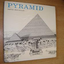

In [36]:
dataset[0]['image']

In [37]:
dataset

Dataset({
    features: ['image', 'text'],
    num_rows: 100
})

In [8]:
from huggingface_hub import notebook_login
notebook_login()

In [15]:
from huggingface_hub import notebook_login
notebook_login()

In [38]:
from datasets import load_dataset
dataset.push_to_hub("irisxue/childrens_book_covers")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/310 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/irisxue/childrens_book_covers/commit/68f7792655e4d9620040e1109860bbc5b798e3ac', commit_message='Upload dataset', commit_description='', oid='68f7792655e4d9620040e1109860bbc5b798e3ac', pr_url=None, pr_revision=None, pr_num=None)